In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe matplotlib

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl.metadata (2.7 kB)
Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)


In [3]:
## skelton 라이브러리 호환 X
!pip install scikit-learn

  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.
tensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.24.4 which is incompatible.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
## 추가 모델들
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [1]:
## 화면 추출 함수 - 고정
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #  RGB로 변환
    
    image.flags.writeable = True                   # Image is now writeable 

    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #  BGR로 변환
    return image, results

In [4]:
## drawing함수를 이용해서 landmarks 추출
## + FACE_CONNECTIONS 모델은 업데이트 되면서 변수값이 바뀜 --> FACEMESH_CONTOURS 원래 사용하려던 모델(이름만 바뀜)
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
## landmarks 추출 함수 -- 고정

def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
## cv2를 사용해서 캠 오픈하는 함수 - 고정 
## 카메라 추출되지 않으면 이 부분에서 오류
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    ## min_detection_confidence, min_tracking_confidence 값을 0~1사이 값으로 조정해서 카메라 설정값 변동 가능
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
       # print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame, results)

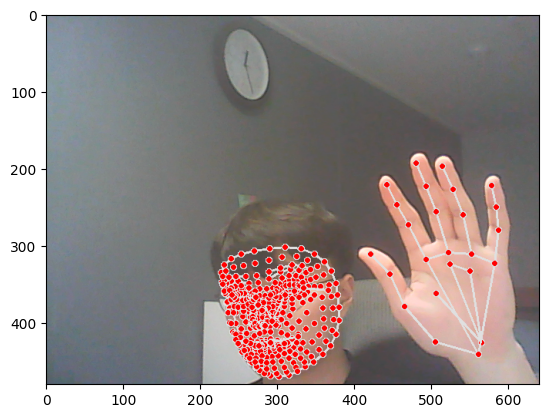

In [8]:
## 종료직전(q) 찍힌 카메라 값-사진으로 추출하는 부분 - mediapipe사용으로 landmark 추출된 사진
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
## mediapipe 관절 번호. -- 안 찍히면 results. 뒤에 값이 카메라 화면에 안 잡힌것.
len(results.left_hand_landmarks.landmark)

21

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
## 생성시킨 변수에 찍힌 행렬값 평탄화
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [12]:
face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [13]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [14]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face

array([ 0.44533426,  0.88223869, -0.02530513, ...,  0.72532445,
       -0.01521713,  0.        ])

In [16]:
results.left_hand_landmarks.landmark

[x: 0.8769102692604065
y: 0.9190114736557007
z: 2.6683875375965727e-07
, x: 0.7895257472991943
y: 0.8863703012466431
z: -0.02152482233941555
, x: 0.7273517847061157
y: 0.7915725708007812
z: -0.027658261358737946
, x: 0.6976670026779175
y: 0.7030231356620789
z: -0.033474668860435486
, x: 0.6588834524154663
y: 0.6482105255126953
z: -0.03918950632214546
, x: 0.7704422473907471
y: 0.6644738912582397
z: -0.00528083648532629
, x: 0.734977126121521
y: 0.5701743960380554
z: -0.02316015027463436
, x: 0.7113030552864075
y: 0.5151007175445557
z: -0.0407458059489727
, x: 0.6907259821891785
y: 0.46229228377342224
z: -0.055473703891038895
, x: 0.8171408772468567
y: 0.6440097689628601
z: -0.012807128950953484
, x: 0.7909896373748779
y: 0.5344385504722595
z: -0.02952556684613228
, x: 0.7707723379135132
y: 0.4655078649520874
z: -0.049143821001052856
, x: 0.7509933710098267
y: 0.4030296802520752
z: -0.06490030884742737
, x: 0.862644612789154
y: 0.6494341492652893
z: -0.02510770782828331
, x: 0.845641076

### 바이트 개수 확인 후 할당하는거 다시

In [17]:
## 위에 변수값에 있으면 평탄화 하고 else = np.zeros(21*3)라고 나오는데 찍히지 않는 부분이 있어도 동작취소되지 않게 0값들이
## 들어있는 행렬로 덮어씌우는 행위. 21*3은 ####( 추가 )
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.45913905,  0.82962054, -0.87512672, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
468*3+33*4+21*3+21*3 
## 총 개수 확인 

1662

In [22]:
np.save('0', result_test) ## numpy 파일 저장

In [23]:
np.load('0.npy') ## numpy 파일 로드

array([ 0.45913905,  0.82962054, -0.87512672, ...,  0.        ,
        0.        ,  0.        ])

## 4. Setup Folders for Collection

In [24]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['pushup', ' arm_curl ', 'squat'])

# 30 videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [25]:
# pushup
## o
## 1
## 2
## ...
## 29
# arm_curl

# squat

In [26]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing

In [2]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [ ]:

cap.release()
cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:
label_map = {label:num for num, label in enumerate(actions)}

In [40]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [41]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [42]:
np.array(sequences).shape

(90, 30, 1662)

In [43]:
np.array(labels).shape

(90,)

In [44]:
X =np.array(sequences)

In [45]:
X.shape

(90, 30, 1662)

In [52]:
y = to_categorical(labels).astype(int)

In [53]:
y.shape

(90, 3)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [54]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [56]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [70]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [71]:
res = [.7, 0.2, 0.1]

In [72]:
actions[np.argmax(res)]

'hello'

In [73]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [78]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 0s 106ms/step - loss: 23.9699 - categorical_accuracy: 0.2471
Epoch 2/2000
3/3 [==============================] - 0s 40ms/step - loss: 16.9604 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 40ms/step - loss: 17.0053 - categorical_accuracy: 0.1647
Epoch 4/2000
3/3 [==============================] - 0s 41ms/step - loss: 13.5786 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 40ms/step - loss: 11.5545 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 0s 41ms/step - loss: 14.5196 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 42ms/step - loss: 16.0842 - categorical_accuracy: 0.3294
Epoch 8/2000
3/3 [==============================] - 0s 42ms/step - loss: 16.7691 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 0s 43ms/step - loss: 5.7268 - categorical_accuracy:

KeyboardInterrupt: 

In [79]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

## 8. Make Predictions

In [80]:
res = model.predict(X_test)

In [81]:
actions[np.argmax(res[4])]

'thanks'

In [83]:
actions[np.argmax(y_test[4])]

'iloveyou'

## 9. Save Weight

In [84]:
model.save('action.h5')

In [68]:
del model

In [85]:
model.load_weights('action.h5')

## 10.Evaluation using Confusion Matrix and Accuracy

In [86]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [87]:
yhat = model.predict(X_test)

In [88]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [89]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3., 0.],
        [2., 0.]],

       [[0., 5.],
        [0., 0.]],

       [[2., 0.],
        [3., 0.]]])

In [90]:
accuracy_score(ytrue, yhat)

0.0

## 11. Test in Real Time

In [91]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [93]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [94]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [95]:
len(sequence)

TypeError: object of type 'int' has no len()

In [96]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cap.release()
cv2.destroyAllWindows()